In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import tqdm
from nba_api.stats.endpoints.shotchartdetail import ShotChartDetail
import requests
from nba_api.stats.static.players import find_players_by_full_name
from adjustText import adjust_text
from io import BytesIO
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import time
from PIL import Image
from collections import defaultdict

In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [3]:
from nba_api.stats.endpoints.playbyplayv2 import PlayByPlayV2

from nba_api.stats.endpoints.playbyplay import PlayByPlay
from nba_api.stats.endpoints.leaguegamefinder import LeagueGameFinder
from nba_api.stats.static.players import find_players_by_full_name
from nba_api.stats.static.teams import find_teams_by_full_name
from nba_api.stats.endpoints.playergamelogs import PlayerGameLogs
from nba_api.stats.endpoints.boxscoretraditionalv2 import BoxScoreTraditionalV2
from nba_api.stats.endpoints.shotchartdetail import ShotChartDetail

from nba_api.stats.endpoints.leaguedashteamshotlocations import LeagueDashTeamShotLocations
from nba_api.stats.endpoints.leaguedashplayerptshot import LeagueDashPlayerPtShot

from nba_api.stats.endpoints.playerdashboardbyshootingsplits import PlayerDashboardByShootingSplits
from nba_api.stats.endpoints.synergyplaytypes import SynergyPlayTypes
from nba_api.stats.endpoints.leaguedashptstats import LeagueDashPtStats
from nba_api.stats.endpoints.leaguedashplayerstats import LeagueDashPlayerStats

from nba_api.stats.endpoints.leaguehustlestatsplayer import LeagueHustleStatsPlayer
from nba_api.stats.endpoints.leaguedashteamstats import LeagueDashTeamStats
from nba_api.stats.endpoints.leaguehustlestatsteam import LeagueHustleStatsTeam
from nba_api.stats.endpoints.leaguedashteamstats import LeagueDashTeamStats

## IDEJE

* Isaac Okoro i njegova uloga + Chedi

* reverse Usage curve za Lowryja?

* chris paul free throw misses + Ayton + Jokic + CJ
    
    * LeBron, Whiteside, Adams pozitivan skok

* Scatter ili nes s avg sec/dribble per touch i potential assists

* Braća Martin

* Što je s Shaiom

* Assisted/Unassisted rate za mid-range/tricu

Prvo provjerit %diff

In [4]:
cur_season = LeagueDashPlayerStats(per_mode_detailed='PerGame').get_data_frames()[0]

In [5]:

past_season = LeagueDashPlayerStats(per_mode_detailed='PerGame', season='2020-21').get_data_frames()[0]

In [6]:
merged_df = pd.merge(left=past_season, right=cur_season, on=['PLAYER_ID', 'PLAYER_NAME'], suffixes=('_PAST', '_CUR'))

In [8]:
merged_df.loc[:, 'FT_PCT_DIFF'] = merged_df.FT_PCT_CUR - merged_df.FT_PCT_PAST
merged_df.loc[:, 'FG3_PCT_DIFF'] = merged_df.FG3_PCT_CUR - merged_df.FG3_PCT_PAST

In [14]:
merged_df.FGA_PAST

0      10.0
1       6.6
2       3.9
3       4.8
4      12.9
       ... 
392     5.7
393     5.1
394     3.6
395    19.4
396     2.5
Name: FGA_PAST, Length: 397, dtype: float64

In [18]:
subset = merged_df.loc[((merged_df.FGA_CUR > 5) | (merged_df.FGA_PAST > 5)) & (merged_df.GP_CUR > 10) & (merged_df.GP_PAST > 30)]

In [26]:
subset.sort_values(by='FT_PCT_DIFF', ascending=False).loc[(merged_df.FTA_CUR > 2) & (merged_df.FTA_PAST > 2)]

,PLAYER_ID,PLAYER_NAME,NICKNAME_PAST,TEAM_ID_PAST,TEAM_ABBREVIATION_PAST,AGE_PAST,GP_PAST,W_PAST,L_PAST,W_PCT_PAST,...,PFD_RANK_CUR,PTS_RANK_CUR,PLUS_MINUS_RANK_CUR,NBA_FANTASY_PTS_RANK_CUR,DD2_RANK_CUR,TD3_RANK_CUR,CFID_CUR,CFPARAMS_CUR,FT_PCT_DIFF,FG3_PCT_DIFF
149,202355,Hassan Whiteside,Hassan,1610612758,SAC,32.0,36,16,20,0.444,...,134,210,64,171,47,17,5,"202355,1610612762",0.187,0.000
349,203500,Steven Adams,Steven,1610612740,NOP,27.0,58,26,32,0.448,...,66,231,117,128,62,17,5,"203500,1610612763",0.166,0.000
242,1630163,LaMelo Ball,LaMelo,1610612766,CHA,19.0,51,23,28,0.451,...,62,32,121,10,20,5,5,"1630163,1610612766",0.142,0.039
212,203994,Jusuf Nurkic,Jusuf,1610612757,POR,26.0,37,22,15,0.595,...,56,101,238,69,20,17,5,"203994,1610612757",0.131,-0.162
0,203932,Aaron Gordon,Aaron,1610612743,DEN,25.0,50,29,21,0.580,...,67,86,34,96,81,17,5,"203932,1610612743",0.096,0.007
252,1629652,Luguentz Dort,Luguentz,1610612760,OKC,22.0,52,18,34,0.346,...,57,60,474,104,143,17,5,"1629652,1610612760",0.093,-0.011
105,1628415,Dillon Brooks,Dillon,1610612763,MEM,25.0,67,36,31,0.537,...,40,47,14,87,143,17,5,"1628415,1610612763",0.085,-0.016
282,1629650,Moses Brown,Moses,1610612738,BOS,21.0,43,8,35,0.186,...,168,341,116,360,143,17,5,"1629650,1610612742",0.071,0.000
247,2544,LeBron James,LeBron,1610612747,LAL,36.0,45,30,15,0.667,...,17,7,78,4,39,5,5,"2544,1610612747",0.069,-0.013
379,1629639,Tyler Herro,Tyler,1610612748,MIA,21.0,54,29,25,0.537,...,105,29,164,73,92,17,5,"1629639,1610612748",0.061,0.022


In [13]:
seasons = [f"{item}-{str(item+1)[-2:]}" for item in range(2000, 2021)]

In [14]:
shot_dict = {}

In [36]:

shot_dfs = []
for season in seasons:
    print(season)
    if season in shot_dict:
        print("FOUND")
        shot_dfs.append(shot_dict[season])
        continue
    shot_df = ShotChartDetail(team_id=0, player_id=0, season_nullable=season, context_measure_simple='FGM', timeout=1500).get_data_frames()[0]
    shot_df.loc[:, 'SEASON'] = season
    shot_dict[season] = shot_df
    time.sleep(5)
    shot_dfs.append(shot_df)

2000-01
FOUND
2001-02
FOUND
2002-03
FOUND
2003-04
FOUND
2004-05
FOUND
2005-06
FOUND
2006-07
FOUND
2007-08
FOUND
2008-09
FOUND
2009-10
FOUND
2010-11
FOUND
2011-12
FOUND
2012-13
FOUND
2013-14
FOUND
2014-15
FOUND
2015-16
FOUND
2016-17
FOUND
2017-18
FOUND
2018-19
FOUND
2019-20
2020-21


In [37]:
previous_seasons = pd.concat(shot_dfs)

In [39]:
previous_seasons.to_csv('shots_made_00s_2021.csv')

In [77]:
season = '2021-22'

In [41]:
cur_shot_df = ShotChartDetail(team_id=0, player_id=0, season_nullable=season, context_measure_simple='FGM', timeout=1200).get_data_frames()[0]


In [78]:
cur_shot_df.loc[:, 'SEASON'] = season

In [79]:
full_shot = pd.concat([previous_seasons, cur_shot_df])

In [80]:
full_shot.to_csv('shots_made_00s_today.csv')

In [66]:
pbps = []
for season in seasons:
    print(season)
    df = pd.read_csv(f'pbp_data/{season}.csv')
    df.loc[:, 'SEASON'] = season
    pbps.append(df)

2000-01
2001-02
2002-03
2003-04
2004-05
2005-06
2006-07
2007-08
2008-09
2009-10
2010-11
2011-12
2012-13
2013-14
2014-15
2015-16
2016-17
2017-18
2018-19
2019-20
2020-21


c:\users\danie\appdata\local\programs\python\python37\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


2021-22


In [67]:
season = '2021-22'
df = pd.read_csv(f'pbp_data/{season}.csv')
df.loc[:, 'SEASON'] = season
pbps.append(df)

In [81]:
full_pbp = pd.concat(pbps)

c:\users\danie\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [82]:
made_shots_pbp = full_pbp.loc[full_pbp.EVENTMSGTYPE == 1]

In [83]:
made_shots = full_shot.loc[full_shot.SHOT_MADE_FLAG == 1]

In [87]:
len(made_shots)

1954540

In [88]:
len(made_shots_pbp)

2022392

In [89]:
made_shots_pbp.loc[:, 'STR_GAME_ID'] = [f"00{str(item)}" for item in made_shots_pbp.GAME_ID]

c:\users\danie\appdata\local\programs\python\python37\lib\site-packages\pandas\core\indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
c:\users\danie\appdata\local\programs\python\python37\lib\site-packages\pandas\core\indexing.py:480: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [90]:
merged_data = pd.merge(left=made_shots, right=made_shots_pbp, left_on=('GAME_ID', 'GAME_EVENT_ID'), right_on=('STR_GAME_ID', 'EVENTNUM'))

In [91]:
merged_data.SHOT_ZONE_BASIC.unique()

array(['Restricted Area', 'Mid-Range', 'Right Corner 3', 'Left Corner 3',
       'Above the Break 3', 'In The Paint (Non-RA)', 'Backcourt'],
      dtype=object)

In [92]:
assisted_shots = merged_data.loc[merged_data.PLAYER2_ID != 0]

In [93]:
unassisted_shots = merged_data.loc[merged_data.PLAYER2_ID == 0]

In [94]:
total = len(merged_data)

In [95]:
merged_data.to_csv('merged_made_shots_00_01_today.csv')

## Loading

In [96]:
merged_data = pd.read_csv('merged_made_shots_00_01_today.csv')

In [97]:
seasons = [f"{item}-{str(item+1)[-2:]}" for item in range(2000, 2022)]

In [98]:
assisted_shots = merged_data.loc[merged_data.PLAYER2_ID != 0]

unassisted_shots = merged_data.loc[merged_data.PLAYER2_ID == 0]

total = len(merged_data)

In [99]:
merged_data.loc[merged_data.SEASON_x == '2021-22']

,Unnamed: 0,GRID_TYPE,GAME_ID_x,GAME_EVENT_ID,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_NAME,PERIOD_x,MINUTES_REMAINING,...,PLAYER3_TEAM_CITY,PLAYER3_TEAM_ID,PLAYER3_TEAM_NICKNAME,SCORE,SCOREMARGIN,SEASON_y,VIDEO_AVAILABLE_FLAG,VISITORDESCRIPTION,WCTIMESTRING,STR_GAME_ID
1883953,1883953,Shot Chart Detail,22100001,20,1629651,Nic Claxton,1610612751,Brooklyn Nets,1,10,...,NaN,NaN,NaN,2 - 0,-2,2021-22,1,Claxton Alley Oop Dunk (2 PTS) (Harden 1 AST),7:40 PM,22100001
1883954,1883954,Shot Chart Detail,22100001,20,1629651,Nic Claxton,1610612751,Brooklyn Nets,1,10,...,NaN,NaN,NaN,2 - 0,-2,2021-22,1,Claxton Alley Oop Dunk (2 PTS) (Harden 1 AST),7:40 PM,22100001
1883955,1883955,Shot Chart Detail,22100001,24,203507,Giannis Antetokounmpo,1610612749,Milwaukee Bucks,1,10,...,NaN,NaN,NaN,2 - 2,TIE,2021-22,1,NaN,7:40 PM,22100001
1883956,1883956,Shot Chart Detail,22100001,24,203507,Giannis Antetokounmpo,1610612749,Milwaukee Bucks,1,10,...,NaN,NaN,NaN,2 - 2,TIE,2021-22,1,NaN,7:40 PM,22100001
1883957,1883957,Shot Chart Detail,22100001,27,201572,Brook Lopez,1610612749,Milwaukee Bucks,1,10,...,NaN,NaN,NaN,2 - 5,3,2021-22,1,NaN,7:41 PM,22100001
1883958,1883958,Shot Chart Detail,22100001,27,201572,Brook Lopez,1610612749,Milwaukee Bucks,1,10,...,NaN,NaN,NaN,2 - 5,3,2021-22,1,NaN,7:41 PM,22100001
1883959,1883959,Shot Chart Detail,22100001,29,201142,Kevin Durant,1610612751,Brooklyn Nets,1,9,...,NaN,NaN,NaN,4 - 5,1,2021-22,1,Durant 13' Turnaround Jump Shot (2 PTS) (Harde...,7:41 PM,22100001
1883960,1883960,Shot Chart Detail,22100001,29,201142,Kevin Durant,1610612751,Brooklyn Nets,1,9,...,NaN,NaN,NaN,4 - 5,1,2021-22,1,Durant 13' Turnaround Jump Shot (2 PTS) (Harde...,7:41 PM,22100001
1883961,1883961,Shot Chart Detail,22100001,40,203507,Giannis Antetokounmpo,1610612749,Milwaukee Bucks,1,9,...,NaN,NaN,NaN,4 - 7,3,2021-22,1,NaN,7:41 PM,22100001
1883962,1883962,Shot Chart Detail,22100001,40,203507,Giannis Antetokounmpo,1610612749,Milwaukee Bucks,1,9,...,NaN,NaN,NaN,4 - 7,3,2021-22,1,NaN,7:41 PM,22100001


In [100]:
assisted_mid_range = []
unassisted_mid_range = []
assisted_triples = []
unassisted_triples = []

for season in seasons:
    mid_range_assisted = assisted_shots.loc[(assisted_shots.SHOT_ZONE_BASIC == 'Mid-Range') & (assisted_shots.SEASON_x == season)]
    mid_range_unassisted = unassisted_shots.loc[(unassisted_shots.SHOT_ZONE_BASIC == 'Mid-Range') & (unassisted_shots.SEASON_x == season)]
    total_season = len(merged_data.loc[merged_data.SEASON_x == season])

    assisted_mid_range.append(len(mid_range_assisted) / total_season * 100)
    unassisted_mid_range.append(len(mid_range_unassisted) / total_season * 100)
    triple_assisted = assisted_shots.loc[(assisted_shots.SHOT_ZONE_BASIC.str.contains('3')) & (assisted_shots.SEASON_x == season)]
    triple_unassisted = unassisted_shots.loc[(unassisted_shots.SHOT_ZONE_BASIC.str.contains('3')) & (unassisted_shots.SEASON_x == season)]
    assisted_triples.append(len(triple_assisted) / total_season * 100)
    unassisted_triples.append(len(triple_unassisted) / total_season * 100)
    

In [101]:
ast_mid_range = '#8F1B47'
uast_mid_range = '#F72A94'
ast_3pt = '#252394'
uast_3pt = '#417DD1'

In [102]:
plt.style.use('fivethirtyeight')

Text(0, 0.5, 'Shots per game')

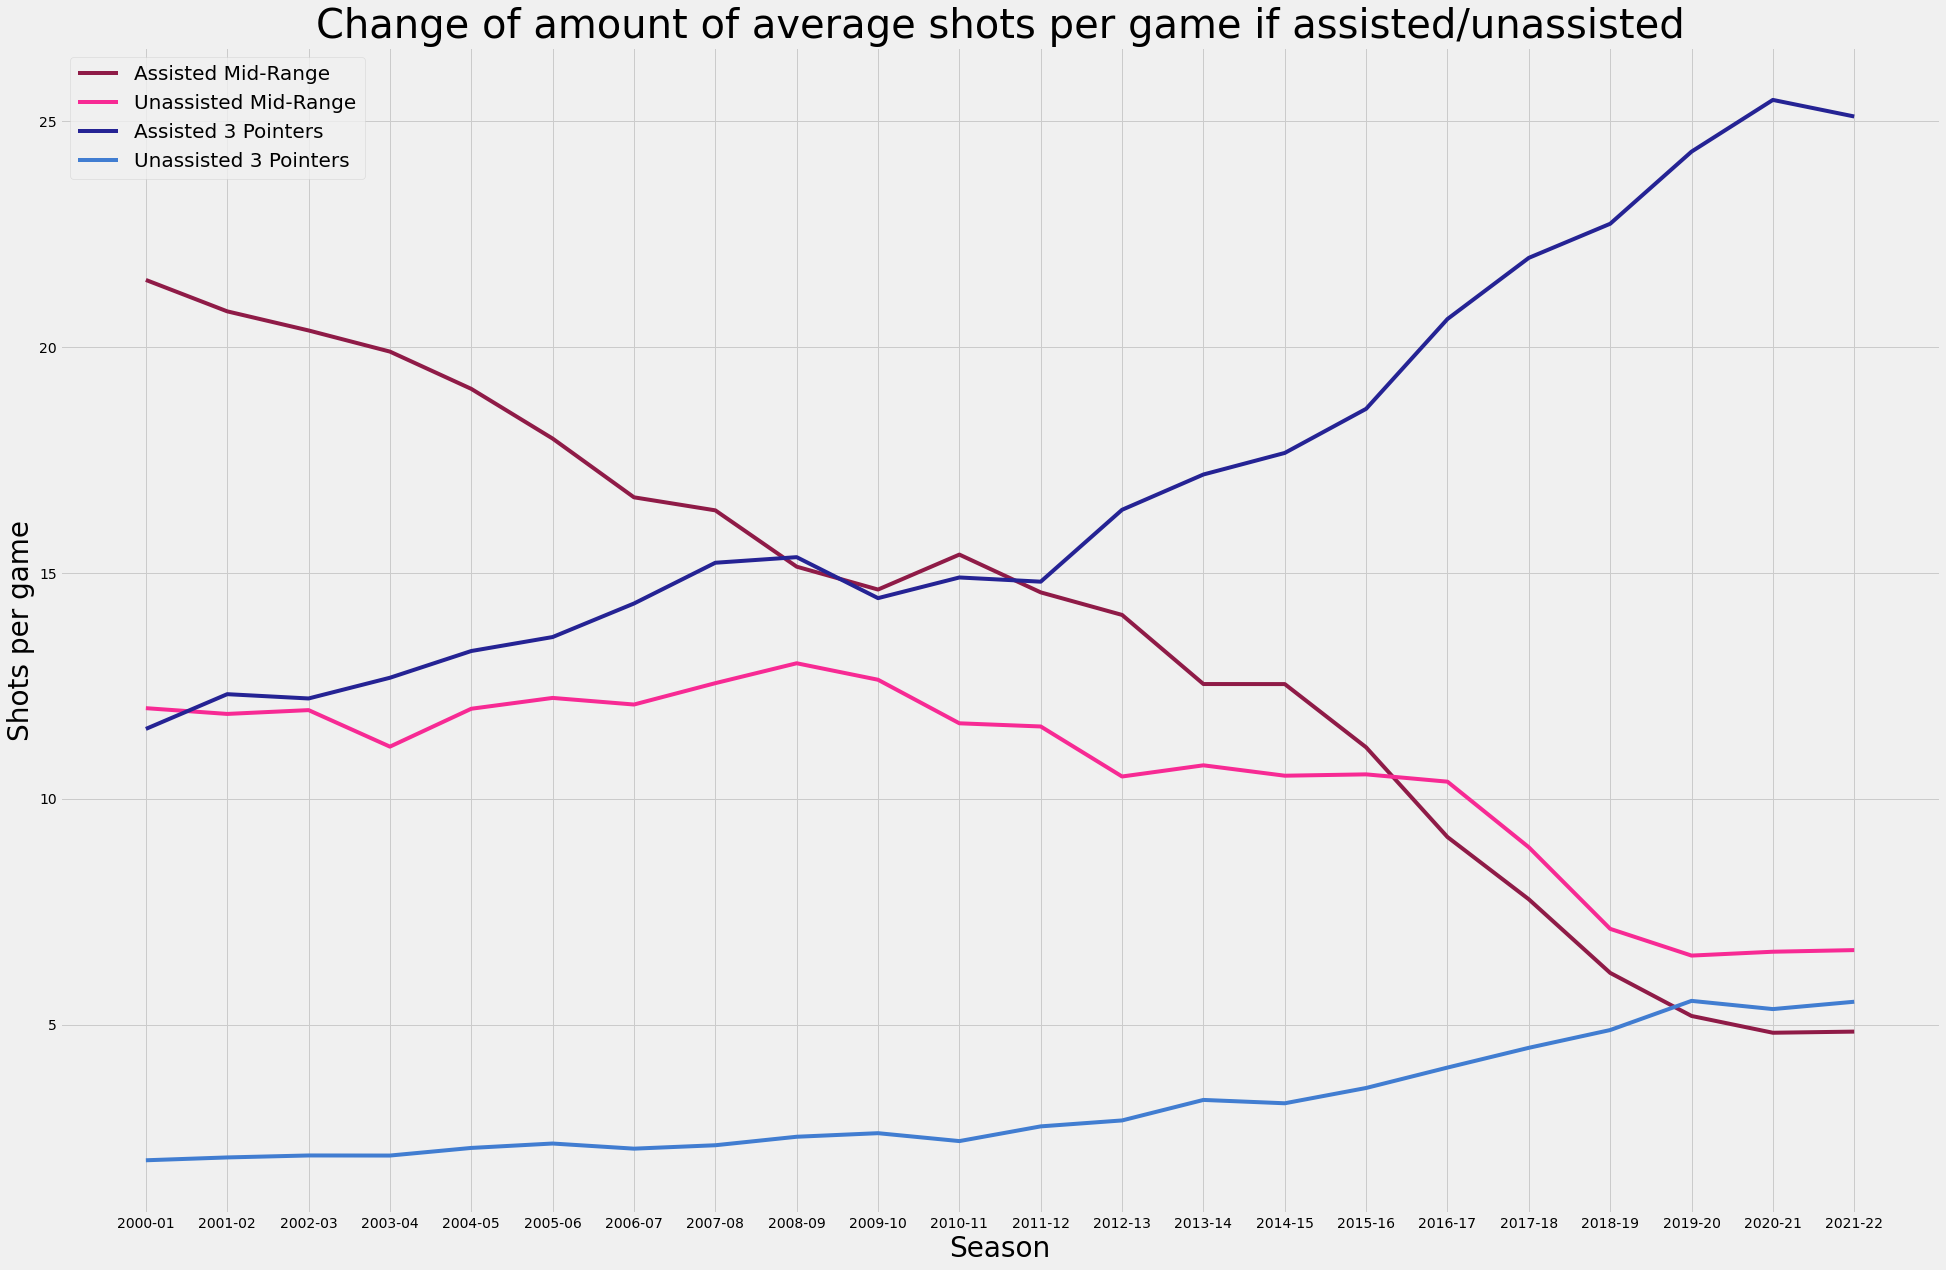

In [103]:
fig, ax = plt.subplots(figsize=(30, 20))

ax.plot(seasons, assisted_mid_range, color=ast_mid_range, label='Assisted Mid-Range')
ax.plot(seasons, unassisted_mid_range, color=uast_mid_range, label='Unassisted Mid-Range')
ax.plot(seasons, assisted_triples, color=ast_3pt, label='Assisted 3 Pointers')
ax.plot(seasons, unassisted_triples, color=uast_3pt, label='Unassisted 3 Pointers')

ax.legend(fontsize=20)
ax.set_title("Change of amount of average shots per game if assisted/unassisted", size=40)
ax.set_xlabel("Season", size=28)
ax.set_ylabel("Shots per game", size=28)

In [104]:
shot_locations = LeagueDashTeamShotLocations(season='2021-22', per_mode_detailed='PerGame')

In [105]:
areas =  [
    'Restricted Area',
    'In The Paint (Non-RA)',
    'Mid-Range',
    'Left Corner 3',
    'Right Corner 3',
    'Above the Break 3',
    'Backcourt',
    'Corner 3'
]

In [106]:
columns = ['TEAM_ID', 'TEAM_NAME']

for area in areas:
    columns.append(f'FGM_{area}')
    columns.append(f'FGA_{area}')
    columns.append(f'FG_PCT_{area}')

In [107]:
shot_locations = LeagueDashTeamShotLocations(season='2021-22', per_mode_detailed='PerGame').get_dict()
df = pd.DataFrame(data=shot_locations['resultSets']['rowSet'], columns=columns)

In [108]:
df['FGA_Mid-Range'].mean()

11.4

In [109]:
df.columns

Index(['TEAM_ID', 'TEAM_NAME', 'FGM_Restricted Area', 'FGA_Restricted Area',
       'FG_PCT_Restricted Area', 'FGM_In The Paint (Non-RA)',
       'FGA_In The Paint (Non-RA)', 'FG_PCT_In The Paint (Non-RA)',
       'FGM_Mid-Range', 'FGA_Mid-Range', 'FG_PCT_Mid-Range',
       'FGM_Left Corner 3', 'FGA_Left Corner 3', 'FG_PCT_Left Corner 3',
       'FGM_Right Corner 3', 'FGA_Right Corner 3', 'FG_PCT_Right Corner 3',
       'FGM_Above the Break 3', 'FGA_Above the Break 3',
       'FG_PCT_Above the Break 3', 'FGM_Backcourt', 'FGA_Backcourt',
       'FG_PCT_Backcourt', 'FGM_Corner 3', 'FGA_Corner 3', 'FG_PCT_Corner 3'],
      dtype='object')

In [110]:
mid_range_shots = []
triples = []

for season in seasons:
    shot_locations = LeagueDashTeamShotLocations(season=season, per_mode_detailed='PerGame').get_dict()
    df = pd.DataFrame(data=shot_locations['resultSets']['rowSet'], columns=columns)
    mid_range_shots.append(df['FGA_Mid-Range'].mean())
    triples.append(df['FGA_Corner 3'].mean() + df['FGA_Above the Break 3'].mean())

Text(0, 0.5, 'Shots per game')

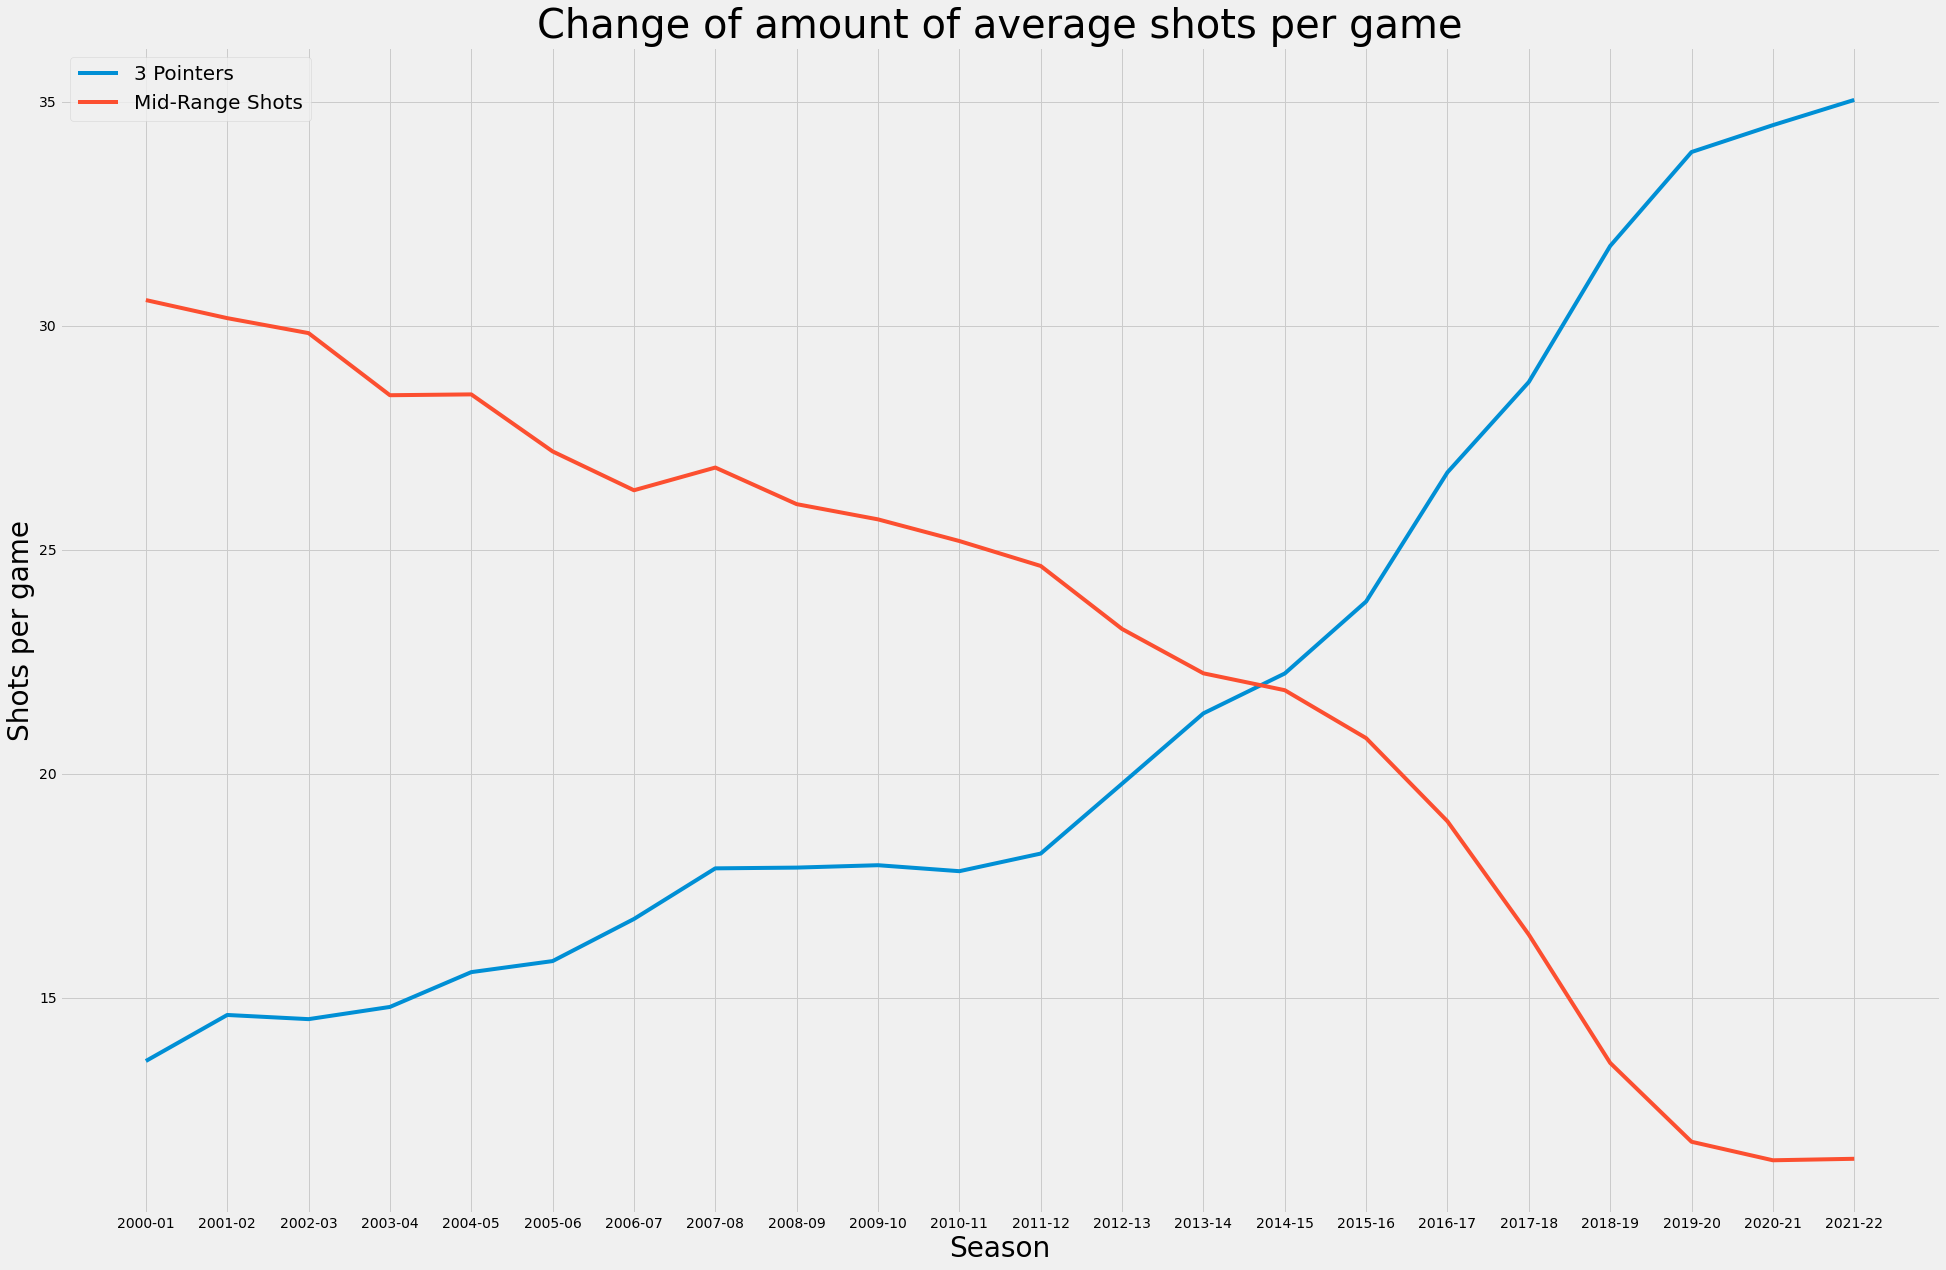

In [111]:
fig, ax = plt.subplots(figsize=(30, 20))

ax.plot(seasons, triples, label='3 Pointers')
ax.plot(seasons, mid_range_shots,  label='Mid-Range Shots')

ax.legend(fontsize=20)
ax.set_title("Change of amount of average shots per game", size=40)
ax.set_xlabel("Season", size=28)
ax.set_ylabel("Shots per game", size=28)